<a href="https://colab.research.google.com/github/ratheesh-17/AIOT3/blob/main/AIOT3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the dependencies

In [ ]:
import pandas as pd
import numpy as np
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

Loading the dataset

In [ ]:
df = pd.read_csv("/content/maintenance_data_moderate.csv")
df.dropna()

,Temperature,Vibration,Pressure,RuntimeHours,Load,Failure
0,79.967142,0.592618,36.996777,3359,90.401131,0
1,73.617357,0.690942,34.623168,4255,60.802568,1
2,81.476885,0.360143,30.298152,3062,73.330389,0
3,90.230299,0.556297,26.765316,3988,90.836160,0
4,72.658466,0.434936,33.491117,3490,53.369228,1
...,...,...,...,...,...,...
495,80.389100,0.471890,40.030464,2566,61.244511,0
496,64.627538,0.679769,40.307518,2382,71.569032,0
497,73.096613,0.564084,36.041831,1956,85.957995,0
498,66.243817,0.442882,35.120313,2098,78.166232,0


Cleaning the dataset

In [ ]:
df['temp_avg'] = df['Temperature'].rolling(window = 3).mean()
df['vibration_diff'] = df['Vibration'].diff()
df.dropna()

,Temperature,Vibration,Pressure,RuntimeHours,Load,Failure,temp_avg,vibration_diff
2,81.476885,0.360143,30.298152,3062,73.330389,0,78.353795,-0.330798
3,90.230299,0.556297,26.765316,3988,90.836160,0,81.774847,0.196154
4,72.658466,0.434936,33.491117,3490,53.369228,1,81.455217,-0.121361
5,72.658630,0.451287,31.967427,4601,69.369629,1,78.515798,0.016352
6,90.792128,0.440761,34.475966,763,92.592062,0,78.703075,-0.010527
...,...,...,...,...,...,...,...,...
495,80.389100,0.471890,40.030464,2566,61.244511,0,79.002500,0.072052
496,64.627538,0.679769,40.307518,2382,71.569032,0,78.415960,0.207879
497,73.096613,0.564084,36.041831,1956,85.957995,0,72.704417,-0.115684
498,66.243817,0.442882,35.120313,2098,78.166232,0,67.989323,-0.121202


In [ ]:
X = df.drop(['Failure'],axis=1)
y = df['Failure']

Splitting the dataset

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Fitting the model

In [ ]:
model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

Predicting and Visualizing

              precision    recall  f1-score   support

           0       0.79      0.95      0.86        80
           1       0.00      0.00      0.00        20

    accuracy                           0.76       100
   macro avg       0.40      0.47      0.43       100
weighted avg       0.63      0.76      0.69       100



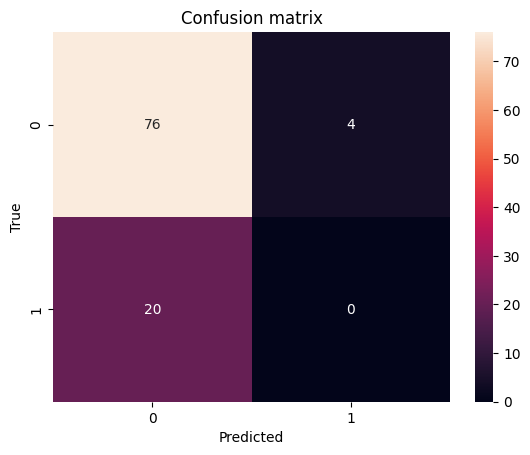

In [ ]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)
plt.title('Confusion matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()